# Earthquakes


## Load Merged Data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/FYP /merged_df.csv')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Missing Value Handling

In [ ]:
(df.isnull().sum() / len(df)) * 100

Unnamed: 0              0.000000
Event Id                0.000000
Origin                  0.000000
Depth                   0.000000
Mag Type                0.000000
Magnitude               0.000000
Network                 0.000000
Station                 0.000000
Location                0.000000
Latitude                0.000000
Longitude               0.000000
Elevation               0.000000
Epicentral Distance     0.000000
PGA Vertical            0.031877
PGA Horizontal 1        0.071723
PGA Horizontal 2        0.057112
PGA Vertical.1          0.031877
PGA Horizontal 1.1      0.071723
PGA Horizontal 2.1      0.057112
PGV Vertical            0.030549
PGV Horizontal 1        0.071723
PGV Horizontal 2        0.057112
PSA 0.3 Vertical        0.030549
PSA 0.3 Horizontal 1    0.071723
PSA 0.3 Horizontal 2    0.057112
PSA 1.0 Vertical        0.030549
PSA 1.0 Horizontal 1    0.071723
PSA 1.0 Horizontal 2    0.057112
PSA 3.0 Vertical        0.030549
PSA 3.0 Horizontal 1    0.071723
PSA 3.0 Ho

In [ ]:
df = df.dropna()

Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Data Type Conversions

In [ ]:
df.dtypes

Unnamed: 0                int64
Event Id                 object
Origin                   object
Depth                     int64
Mag Type                 object
Magnitude               float64
Network                  object
Station                  object
Location                  int64
Latitude                float64
Longitude               float64
Elevation                 int64
Epicentral Distance       int64
PGA Vertical            float64
PGA Horizontal 1        float64
PGA Horizontal 2        float64
PGA Vertical.1          float64
PGA Horizontal 1.1      float64
PGA Horizontal 2.1      float64
PGV Vertical            float64
PGV Horizontal 1        float64
PGV Horizontal 2        float64
PSA 0.3 Vertical        float64
PSA 0.3 Horizontal 1    float64
PSA 0.3 Horizontal 2    float64
PSA 1.0 Vertical        float64
PSA 1.0 Horizontal 1    float64
PSA 1.0 Horizontal 2    float64
PSA 3.0 Vertical        float64
PSA 3.0 Horizontal 1    float64
PSA 3.0 Horizontal 2    float64
Site Nam

In [ ]:
df = df.astype({
    'Event Id': 'str',
    'Origin': 'datetime64[ns]',
    'Mag Type': 'str',
    'Network': 'str',
    'Station': 'str',
    'Location': 'str',
    'Site Name': 'str'
})

## Feature Enigneering

## Feature Selection

Features -


*   Event Id
* Depth

*   Station Name
*   Longitude
*   Latitude
* PGA Vertical
* Epicentral distance
* Magnitude
* PGA Vertical            
* PGA Horizontal 1        
* PGA Horizontal 2        
* PGA Vertical.1          
* PGA Horizontal 1.1      
* PGA Horizontal 2.1      
* PGV Vertical            
* PGV Horizontal 1        
* PGV Horizontal 2        
* PSA 0.3 Vertical        
* PSA 0.3 Horizontal 1    
* PSA 0.3 Horizontal 2    
* PSA 1.0 Vertical        
* PSA 1.0 Horizontal 1    
* PSA 1.0 Horizontal 2    
* PSA 3.0 Vertical        
* PSA 3.0 Horizontal 1    
* PSA 3.0 Horizontal 2    






In [ ]:
df_intensity.head()

,PGA Vertical,PGA Horizontal 1,PGA Horizontal 2,PGA Vertical.1,PGA Horizontal 1.1,PGA Horizontal 2.1,PGV Vertical,PGV Horizontal 1,PGV Horizontal 2,PSA 0.3 Vertical,PSA 0.3 Horizontal 1,PSA 0.3 Horizontal 2,PSA 1.0 Vertical,PSA 1.0 Horizontal 1,PSA 1.0 Horizontal 2,PSA 3.0 Vertical,PSA 3.0 Horizontal 1,PSA 3.0 Horizontal 2
0,320.982,712.838,534.569,3.272,7.266,5.449,0.816,3.146,2.090,3.022,11.143,9.593,0.411,0.811,1.242,0.082,0.114,0.114
1,270.380,370.319,579.549,2.756,3.775,5.908,0.980,2.557,2.022,4.982,12.499,16.851,0.355,1.474,0.869,0.037,0.116,0.105
2,482.563,836.537,727.136,4.919,8.527,7.412,0.887,3.514,2.443,4.801,22.542,12.519,0.446,1.191,1.526,0.092,0.103,0.172
3,69.830,118.232,114.341,0.712,1.205,1.166,0.325,0.591,0.459,1.537,2.459,1.882,0.183,0.510,0.376,0.030,0.034,0.028
4,96.127,121.509,112.875,0.980,1.239,1.151,0.322,0.848,0.422,1.252,2.536,2.064,0.193,1.020,0.231,0.025,0.049,0.035


## Weight Assignment

### PCA (Principal Component Analysis)


### Import Libraries

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Standardize the Data

In [ ]:
df_intensity = df[ [
    "PGA Vertical",
    "PGA Horizontal 1",
    "PGA Horizontal 2",
    "PGA Vertical.1",
    "PGA Horizontal 1.1",
    "PGA Horizontal 2.1",
    "PGV Vertical",
    "PGV Horizontal 1",
    "PGV Horizontal 2",
    "PSA 0.3 Vertical",
    "PSA 0.3 Horizontal 1",
    "PSA 0.3 Horizontal 2",
    "PSA 1.0 Vertical",
    "PSA 1.0 Horizontal 1",
    "PSA 1.0 Horizontal 2",
    "PSA 3.0 Vertical",
    "PSA 3.0 Horizontal 1",
    "PSA 3.0 Horizontal 2",
]]


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_intensity)

Explained Variance Ratios: [6.74268126e-01 1.01853565e-01 4.88731012e-02 3.57355750e-02
 2.83711142e-02 2.66083843e-02 2.41800518e-02 1.37109602e-02
 1.17137856e-02 1.03193877e-02 7.51650123e-03 6.48279948e-03
 5.18875307e-03 3.44808583e-03 1.72980845e-03 4.36693460e-10
 4.22596569e-10 3.51328468e-10]


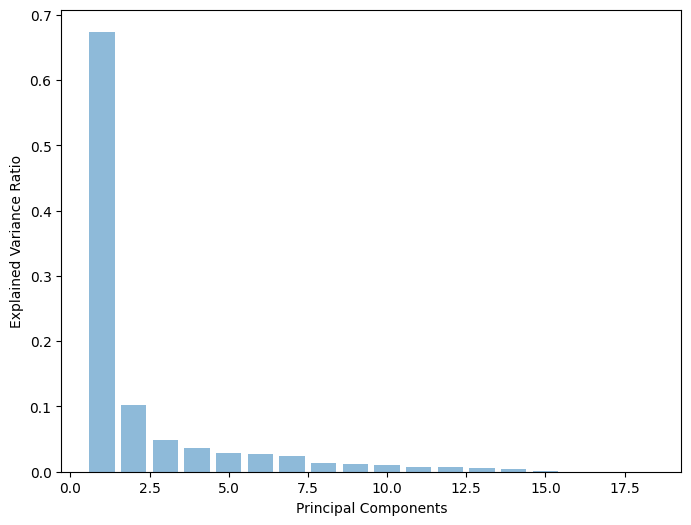

In [ ]:
pca = PCA(n_components=None)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()


Number of components explaining 90% of the variance: 6
Number of components explaining 95% of the variance: 8


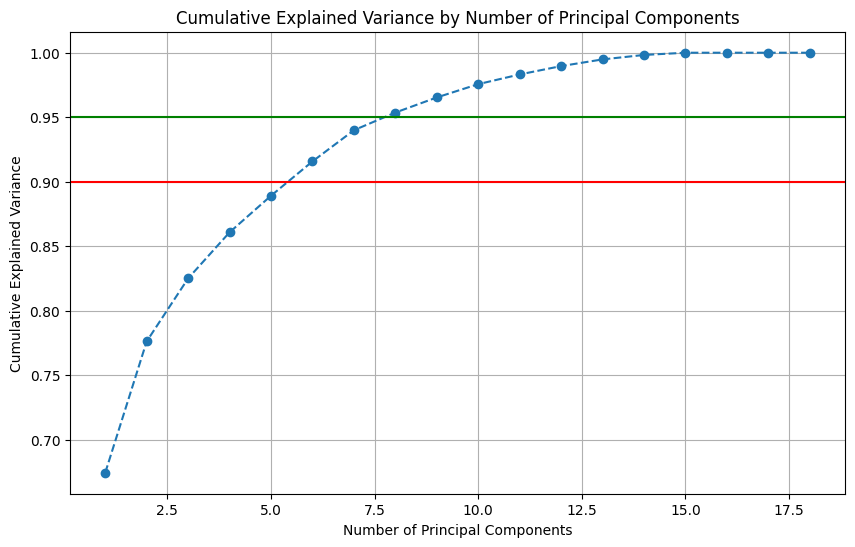

In [ ]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain 90% and 95% of the variance
components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components explaining 90% of the variance: {components_90}")
print(f"Number of components explaining 95% of the variance: {components_95}")

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.95, color='g', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


## Weight Assignment

In [ ]:
# Values and their corresponding variances
values_with_variances = {
    "PGA Vertical": 0.674268126,
    "PGA Horizontal 1": 0.101853565,
    "PGA Horizontal 2": 0.0488731012,
    "PGA Vertical.1": 0.035735575,
    "PGA Horizontal 1.1": 0.0283711142,
    "PGA Horizontal 2.1": 0.0266083843
}

# Function to calculate proportional weights
def calculate_proportional_weights(values_dict):
    total_variance = sum(values_dict.values())
    proportional_weights = {key: (value / total_variance) * 100 for key, value in values_dict.items()}
    return proportional_weights

# Get the proportional weights
proportional_weights = calculate_proportional_weights(values_with_variances)

# Print the proportional weights
for key, value in proportional_weights.items():
    print(f"{key}: {value:.2f}%")


PGA Vertical: 73.63%
PGA Horizontal 1: 11.12%
PGA Horizontal 2: 5.34%
PGA Vertical.1: 3.90%
PGA Horizontal 1.1: 3.10%
PGA Horizontal 2.1: 2.91%


## Impact Score Genreation

In [ ]:
from typing_extensions import final
import pandas as pd
# Weights for the PGAs
weights = {
    "PGA Vertical": 73.63,
    "PGA Horizontal 1": 11.12,
    "PGA Horizontal 2": 5.34,
    "PGA Vertical.1": 3.90,
    "PGA Horizontal 1.1": 3.10,
    "PGA Horizontal 2.1": 2.91
}

# Normalize weights so they sum to 1
total_weight = sum(weights.values())
weights = {k: v / total_weight for k, v in weights.items()}

# Function to compute the PGA impact score for each row
def compute_pga_impact(row):
    pga_impact = sum(row[key] * weights[key] for key in weights)
    return pga_impact

# Normalize a series to the range 0-100
def normalize(series):
    min_val = series.min()
    max_val = series.max()
    normalized = 100 * (series - min_val) / (max_val - min_val)
    return normalized

# Calculate the PGA impact for each row
df['PGA Impact'] = df.apply(compute_pga_impact, axis=1)

# Normalize PGA Impact
df['PGA Impact Normalized'] = normalize(df['PGA Impact'])

# Calculate the magnitude impact and normalize
df['Magnitude Impact'] = df['Magnitude'] / df['Epicentral Distance']
df['Magnitude Impact Normalized'] = normalize(df['Magnitude Impact'])

# Calculate the depth impact (inverse of depth) and normalize
df['Depth Impact'] = df['Depth'].apply(lambda x: 1 / x if x != 0 else 0)
df['Depth Impact Normalized'] = normalize(df['Depth Impact'])

# Calculate the total impact score using the specified weights
df['Total Impact Score'] = (
    0.4 * df['PGA Impact Normalized'] +
    0.4 * df['Magnitude Impact Normalized'] +
    0.2 * df['Depth Impact Normalized']
)

final_df = df[['Station', 'Longitude', 'Latitude', 'Total Impact Score']]

# Display the DataFrame with the new Impact Score columns
print(final_df)


      Station  Longitude  Latitude  Total Impact Score
0        NBLC    172.731   -43.507            2.843011
1        NNBS    172.718   -43.495            2.711414
2        HPSC    172.702   -43.502            3.100896
3        PARS    172.751   -43.568            2.349659
4        GODS    172.770   -43.578            2.385071
...       ...        ...       ...                 ...
75285    CMHS    172.624   -43.566            2.618201
75286    CACS    172.530   -43.483            2.729871
75287    CBGS    172.620   -43.529            2.569213
75288    PPHS    172.607   -43.493            2.584108
75289     OXZ    172.038   -43.326            2.563926

[75210 rows x 4 columns]


# Save to CSV

In [ ]:
# prompt: save station_impact_df to a csv file

final_df.to_csv('/content/drive/MyDrive/FYP /station_impact.csv', index=False)

